In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv ("lung_cancer_mortality_data_large_v2.csv")

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [3]:
# Paso 1: Manejo de datos faltantes (puedes ajustar si quieres otras estrategias)
numeric_features = ['age', 'bmi', 'cholesterol_level']
categorical_features = ['gender', 'country', 'smoking_status', 'cancer_stage', 'treatment_type', 'family_history', 'hypertension', 'asthma', 'cirrhosis']

# Objetivo
target = 'survived'

# Paso 2: Codificar variables categóricas y normalizar numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [4]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [5]:

# Paso 3: Componer preprocesador
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [6]:
df = df.sample(n=1000, random_state=42)

In [7]:
# numeric_features = ['age', 'bmi', 'cholesterol_level']
# categorical_features = ['gender', 'country', 'smoking_status', 'cancer_stage', 'treatment_type', 'family_history', 'hypertension', 'asthma', 'cirrhosis']

# Dividir datos
X = df[numeric_features + categorical_features]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



###  **Criterios de selección**

1. **Importancia de variables (Feature Importance)**:

   * Se entrenó un modelo base (`RandomForestClassifier`) porque:

     * No requiere escalado ni codificación previa.
     * Evalúa automáticamente la relevancia de cada variable.
     * Es robusto a datos ruidosos y no lineales.
   * Se usó `.feature_importances_` para obtener una puntuación de relevancia de cada variable.

2. **Selección de las 8-10 variables más importantes**:

   * Se seleccionaron las que obtuvieron los valores más altos de importancia en el modelo.
   * Esto permite conservar solo las variables que más contribuyen al desempeño predictivo.

3. **Balance entre variables numéricas y categóricas**:

   * Se mantuvo una mezcla de variables de ambos tipos para capturar distintos patrones:

     * Por ejemplo: `age`, `bmi`, `cholesterol_level` (numéricas) y `gender`, `cancer_stage`, `treatment_type`, `smoking_status` (categóricas).

---

In [8]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegúrate de tener un **pipeline** que incluya:

# * Imputación de datos faltantes
# * Codificación de variables categóricas
# * Normalización de variables numéricas


In [9]:


### ✅ **2. Entrenar el modelo**

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline completo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Entrenar modelo
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'cholesterol_level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'country',
                                                   'smoking_status',
                                                   'cancer_stage',
                                                   'treatment_type',
                                                   'family_history',
                                                   'hypertension', 'asthma',
                                                   'cirrhosis'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [10]:

###  **3. Predecir resultados**

y_pred = clf.predict(X_test)



In [11]:
###  **6. Evaluar el modelo**

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [12]:

###  **4. Evaluar el modelo**

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[160   0]
 [ 40   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Use


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

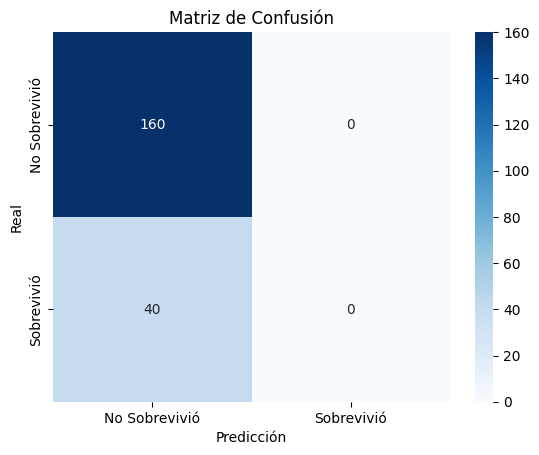

In [13]:
###  4. **Reporte completo y Matriz de confusión**

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

### **Predicciones con nuevos datos**

In [14]:

###  **5. Hacer predicciones con nuevos datos**

#Una vez entrenado el modelo, puedes hacer predicciones con datos nuevos como este:

nuevo_paciente = pd.DataFrame([{
    'age': 60,
    'bmi': 28.5,
    'cholesterol_level': 220,
    'gender': 'female',
    'country': 'USA',
    'smoking_status': 'never',
    'cancer_stage': 'I',
    'treatment_type': 'chemo',
    'family_history': 'yes',
    'hypertension': 'no',
    'asthma': 'no',
    'cirrhosis': 'no'
}])

prediccion = clf.predict(nuevo_paciente)
print("¿Sobrevive?:", "Sí" if prediccion[0] == 1 else "No")

¿Sobrevive?: No
